In [1]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
np.random.seed(42)

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Картинки 24х24, развернем каждую в вектор длины 784.

In [4]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [5]:
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32')

Масштабируем данные.

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [8]:
y_train[:3, :]

array([[ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.]])

In [9]:
model = Sequential()

In [10]:
model.add(Dense(800, input_dim=784, init='normal', activation='relu'))

In [11]:
model.add(Dense(10, init='normal', activation='softmax'))

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [13]:
print(model.summary())

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_1 (Dense)                  (None, 800)           628000      dense_input_1[0][0]              
____________________________________________________________________________________________________
dense_2 (Dense)                  (None, 10)            8010        dense_1[0][0]                    
Total params: 636,010
Trainable params: 636,010
Non-trainable params: 0
____________________________________________________________________________________________________
None


Визуализация модели (нужно выполнить pip install pydot-ng)

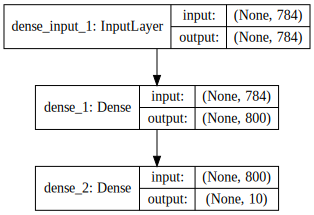

In [14]:
from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

## Callbacks
### Ранняя остановка
Нужно также сказать несколько слов о такой важной особенности Keras, как колбеки. Через них реализовано много полезной функциональности. Например, если вы тренируете сеть в течение очень долгого времени, вам нужно понять, когда пора остановиться, если ошибка на вашем датасете перестала уменьшаться. По-английски описываемая функциональность называется "early stopping" ("ранняя остановка").

In [18]:
from keras.callbacks import EarlyStopping  
early_stopping = EarlyStopping(monitor='loss')

### Tensorboard
Еще в качестве колбека можно использовать сохранение логов в формате, удобном для Tensorboard — это специальная утилита для обработки и визуализации информации из логов Tensorflow.
После того, как обучение закончится (или даже в процессе!), вы можете запустить Tensorboard, указав абсолютный путь к директории с логами:
tensorboard --logdir=/path/to/logs

In [16]:
from keras.callbacks import TensorBoard  
tensorboard = TensorBoard(log_dir='../logs/', write_graph=True)

In [19]:
%%time
model.fit(X_train_scaled, y_train, batch_size=200, nb_epoch=300, 
          validation_split=0.2, callbacks=[early_stopping, tensorboard], verbose=2);

Train on 48000 samples, validate on 12000 samples
Epoch 1/300
2s - loss: 0.3998 - acc: 0.8919 - val_loss: 0.3405 - val_acc: 0.9072
Epoch 2/300
2s - loss: 0.3285 - acc: 0.9099 - val_loss: 0.2990 - val_acc: 0.9180
Epoch 3/300
2s - loss: 0.2905 - acc: 0.9205 - val_loss: 0.2737 - val_acc: 0.9252
Epoch 4/300
2s - loss: 0.2646 - acc: 0.9272 - val_loss: 0.2574 - val_acc: 0.9294
Epoch 5/300
2s - loss: 0.2455 - acc: 0.9322 - val_loss: 0.2442 - val_acc: 0.9329
Epoch 6/300
2s - loss: 0.2303 - acc: 0.9359 - val_loss: 0.2337 - val_acc: 0.9341
Epoch 7/300
2s - loss: 0.2174 - acc: 0.9396 - val_loss: 0.2247 - val_acc: 0.9362
Epoch 8/300
2s - loss: 0.2066 - acc: 0.9426 - val_loss: 0.2177 - val_acc: 0.9392
Epoch 9/300
2s - loss: 0.1971 - acc: 0.9457 - val_loss: 0.2109 - val_acc: 0.9400
Epoch 10/300
2s - loss: 0.1886 - acc: 0.9480 - val_loss: 0.2057 - val_acc: 0.9420
Epoch 11/300
2s - loss: 0.1810 - acc: 0.9501 - val_loss: 0.2004 - val_acc: 0.9434
Epoch 12/300
2s - loss: 0.1741 - acc: 0.9520 - val_loss: 

2s - loss: 0.0366 - acc: 0.9942 - val_loss: 0.1204 - val_acc: 0.9673
Epoch 102/300
2s - loss: 0.0362 - acc: 0.9942 - val_loss: 0.1204 - val_acc: 0.9673
Epoch 103/300
2s - loss: 0.0359 - acc: 0.9943 - val_loss: 0.1199 - val_acc: 0.9679
Epoch 104/300
2s - loss: 0.0355 - acc: 0.9945 - val_loss: 0.1200 - val_acc: 0.9677
Epoch 105/300
2s - loss: 0.0351 - acc: 0.9945 - val_loss: 0.1200 - val_acc: 0.9677
Epoch 106/300
2s - loss: 0.0348 - acc: 0.9946 - val_loss: 0.1197 - val_acc: 0.9677
Epoch 107/300
2s - loss: 0.0344 - acc: 0.9948 - val_loss: 0.1198 - val_acc: 0.9678
Epoch 108/300
2s - loss: 0.0341 - acc: 0.9948 - val_loss: 0.1196 - val_acc: 0.9678
Epoch 109/300
2s - loss: 0.0337 - acc: 0.9949 - val_loss: 0.1193 - val_acc: 0.9678
Epoch 110/300
2s - loss: 0.0334 - acc: 0.9950 - val_loss: 0.1192 - val_acc: 0.9679
Epoch 111/300
2s - loss: 0.0330 - acc: 0.9951 - val_loss: 0.1191 - val_acc: 0.9680
Epoch 112/300
2s - loss: 0.0327 - acc: 0.9951 - val_loss: 0.1190 - val_acc: 0.9678
Epoch 113/300
2s -

2s - loss: 0.0171 - acc: 0.9990 - val_loss: 0.1155 - val_acc: 0.9700
Epoch 201/300
2s - loss: 0.0170 - acc: 0.9990 - val_loss: 0.1155 - val_acc: 0.9703
Epoch 202/300
2s - loss: 0.0169 - acc: 0.9991 - val_loss: 0.1154 - val_acc: 0.9701
Epoch 203/300
2s - loss: 0.0168 - acc: 0.9990 - val_loss: 0.1154 - val_acc: 0.9703
Epoch 204/300
2s - loss: 0.0168 - acc: 0.9990 - val_loss: 0.1154 - val_acc: 0.9702
Epoch 205/300
2s - loss: 0.0167 - acc: 0.9991 - val_loss: 0.1154 - val_acc: 0.9703
Epoch 206/300
2s - loss: 0.0166 - acc: 0.9991 - val_loss: 0.1154 - val_acc: 0.9703
Epoch 207/300
2s - loss: 0.0165 - acc: 0.9991 - val_loss: 0.1154 - val_acc: 0.9701
Epoch 208/300
2s - loss: 0.0164 - acc: 0.9991 - val_loss: 0.1154 - val_acc: 0.9702
Epoch 209/300
2s - loss: 0.0163 - acc: 0.9991 - val_loss: 0.1155 - val_acc: 0.9703
Epoch 210/300
2s - loss: 0.0163 - acc: 0.9991 - val_loss: 0.1154 - val_acc: 0.9703
Epoch 211/300
2s - loss: 0.0162 - acc: 0.9991 - val_loss: 0.1155 - val_acc: 0.9702
Epoch 212/300
2s -

2s - loss: 0.0116 - acc: 0.9995 - val_loss: 0.1162 - val_acc: 0.9706
Epoch 300/300
2s - loss: 0.0116 - acc: 0.9996 - val_loss: 0.1162 - val_acc: 0.9707
CPU times: user 1h 7min 57s, sys: 2min 7s, total: 1h 10min 4s
Wall time: 12min 8s


C помощью Tensorboard удобно отслеживать процесс обучения нейронной сети. 

<img src='../img/tensorboard_mnist.png'>

Оцениваем качество обучения сети на тестовых данных

In [54]:
scores = model.evaluate(X_test_scaled, y_test, verbose=0)
print("Доля верных ответов на тестовых данных: %.2f%%" % (scores[1]*100))

Доля верных ответов на тестовых данных: 97.25%


## Сохраняем сеть
**Архитектуру – в JSON-файл**

In [21]:
model_json = model.to_json()
with open("mnist_model.json", "w") as json_file:
    json_file.write(model_json)

In [27]:
import pprint
import json

In [30]:
with open("mnist_model.json", "r") as json_file:
    pprint.pprint(json.loads(json_file.read()))

{'class_name': 'Sequential',
 'config': [{'class_name': 'Dense',
             'config': {'W_constraint': None,
                        'W_regularizer': None,
                        'activation': 'relu',
                        'activity_regularizer': None,
                        'b_constraint': None,
                        'b_regularizer': None,
                        'batch_input_shape': [None, 784],
                        'bias': True,
                        'init': 'normal',
                        'input_dim': 784,
                        'input_dtype': 'float32',
                        'name': 'dense_1',
                        'output_dim': 800,
                        'trainable': True}},
            {'class_name': 'Dense',
             'config': {'W_constraint': None,
                        'W_regularizer': None,
                        'activation': 'softmax',
                        'activity_regularizer': None,
                        'b_constraint': None,
          

**Веса сохраняем в бинарный hd5-файл**

In [48]:
model.save_weights("mnist_model.h5")

**Теперь сеть можно восстановить и использовать**

In [51]:
from keras.models import model_from_json

with open("mnist_model.json") as json_file:
    loaded_model_json = json_file.read()

# Создаем модель на основе загруженных данных
loaded_model = model_from_json(loaded_model_json)
# Загружаем веса в модель
loaded_model.load_weights("mnist_model.h5")

Перед использованием модели ее обязательно нужно скомпилировать. 

In [52]:
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [53]:
scores = model.evaluate(X_test_scaled, y_test, verbose=0)
print("Доля верных ответов на тестовых данных: %.2f%%" % (scores[1]*100))

Доля верных ответов на тестовых данных: 97.25%
